In [2]:
#sudo apt-get install libgeos-3.6.2
#sudo apt-get install libgeos-dev
#!pip install --upgrade matplotlib --ignore-installed
#!pip install https://github.com/matplotlib/basemap/archive/v1.2.2rel.zip

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

## Download data

Attributes of .nc files: http://earthpy.org/04_work_with_different_data_formats.html#Open-netCDF-files

In [8]:
# https://rabernat.github.io/research_computing_2018/xarray-tips-and-tricks.html
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.2018.nc'

from netCDF4 import Dataset as NetCDFFile
nc = NetCDFFile(url)
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    Conventions: COARDS
    title: 4x daily NMC reanalysis (2014)
    history: created 2017/12 by Hoop (netCDF2.3)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    dataset_title: NCEP-NCAR Reanalysis 1
    References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.html
    DODS_EXTRA.Unlimited_Dimension: time
    dimensions(sizes): time(1460), lat(73), lon(144)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 air(time, lat, lon)
    groups: 

In [9]:
# Extract data from NetCDF file (will take a minute)
lats = nc.variables['lat'][:]
lons = nc.variables['lon'][:]
time = nc.variables['time'][:]
air  = nc.variables['air'][:]  # shape is time, lat, lon

In [10]:
# Convert time values to datetime objects
import datetime as dt

dt_time = [dt.date(1, 1, 1) + dt.timedelta(hours=t) for t in time]

## Choose map in background

See http://matplotlib.org/basemap/users/mapsetup.html for other projections.

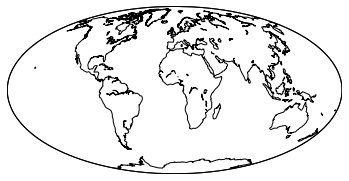

In [11]:
# Setup the map
m = Basemap(projection='moll', llcrnrlat=-90, urcrnrlat=90,\
            llcrnrlon=0, urcrnrlon=360, resolution='c', lon_0=0)
m.drawcoastlines()
m.drawmapboundary()

## Format data to fit map

In [13]:
# Take a random day in the year
time_idx = 237
cur_time = dt_time[time_idx]

print(cur_time)

0219-03-02


In [14]:
# Make the plot continuous
air_cyclic, lons_cyclic = addcyclic(air[time_idx, :, :], lons)

# Shift the grid so lons go from -180 to 180 instead of 0 to 360.
air_cyclic, lons_cyclic = shiftgrid(180., air_cyclic, lons_cyclic, start=False)

# Create 2D lat/lon arrays for Basemap
lon2d, lat2d = np.meshgrid(lons_cyclic, lats)

# Transforms lat/lon into plotting coordinates for projection
x, y = m(lon2d, lat2d)

/home/myself/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:3225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


## Draw contour on map

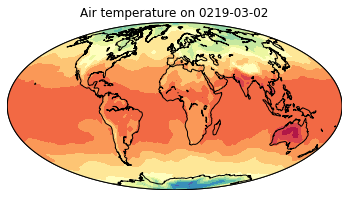

In [32]:
m.drawcoastlines()
m.drawmapboundary()

m.contourf(x, y, air_cyclic, 11, cmap=plt.cm.Spectral_r)
plt.title("Air temperature on %s" % cur_time)
plt.show()

---

This example was taken from http://schubert.atmos.colostate.edu/~cslocum/netcdf_example.html

Other examples: https://matplotlib.org/basemap/users/examples.html

https://rabernat.github.io/research_computing_2018/xarray-tips-and-tricks.html